# Problem Statement:-
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow. -This is a binary classification problem.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.-,Since data is continuous in this column ,so this is a regression problem.

In [88]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df.shape

(8425, 23)

In [4]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

there are few object data type which are to be encoded

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

we see that there are so many null values present in the dataset

In [9]:
##Checking unique values:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# Simple Imputer to fill missing or null values in Dataset:-

In [10]:
## Startegy most_frequent works both for string or numeric data ,so I am using most_frequent.

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

columns = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
for i in columns:
    df[i] = imputer.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now there are not any null values.

In [13]:
col =['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']
for i in col:
    print(f"{i}\n")
    print(df[i].value_counts())
    print("--------------------------")
    print(f"There are {len(df[i].value_counts())} values in column {i}")
    print("-------------------")

Date

2011-02-23    5
2011-03-12    5
2011-03-03    5
2011-02-08    5
2011-05-21    5
             ..
2012-11-28    1
2013-01-29    1
2013-05-07    1
2013-06-02    1
2013-06-06    1
Name: Date, Length: 3004, dtype: int64
--------------------------
There are 3004 values in column Date
-------------------
Location

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
--------------------------
There are 12 values in column Location
-------------------
WindGustDir

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64
--------------------------
There are 16 values in column WindGustDir
------------

In [14]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.182682    23.825365     2.725982     4.810220     4.014042   
std       5.380656     6.128159    10.319872     3.912448     4.744297   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.200000     0.000000     4.000000     0.000000   
50%      13.200000    23.200000     0.000000     4.000000     0.200000   
75%      17.300000    28.000000     0.800000     5.200000     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.036320     13.803917     18.412582    67.858754    51.295193   
std        13.781296     10.138945      9.763307    16.779787    18.316487   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.198944  1015.635347     5.265875     5.230742    17.742326   
std       6.359552     6.286580     2.667166     2.564122     5.613463   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1016.100000  1017.000000     7.000000     7.000000    17.700000   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8425.000000  
mean     22.405982  
std       5.955804  
min       7.300000  
25%      18.100000  
50%      21.800000  
75%      26.300000  
max      44.100000

# Exploratory data analysis

## UniVariate Analysis

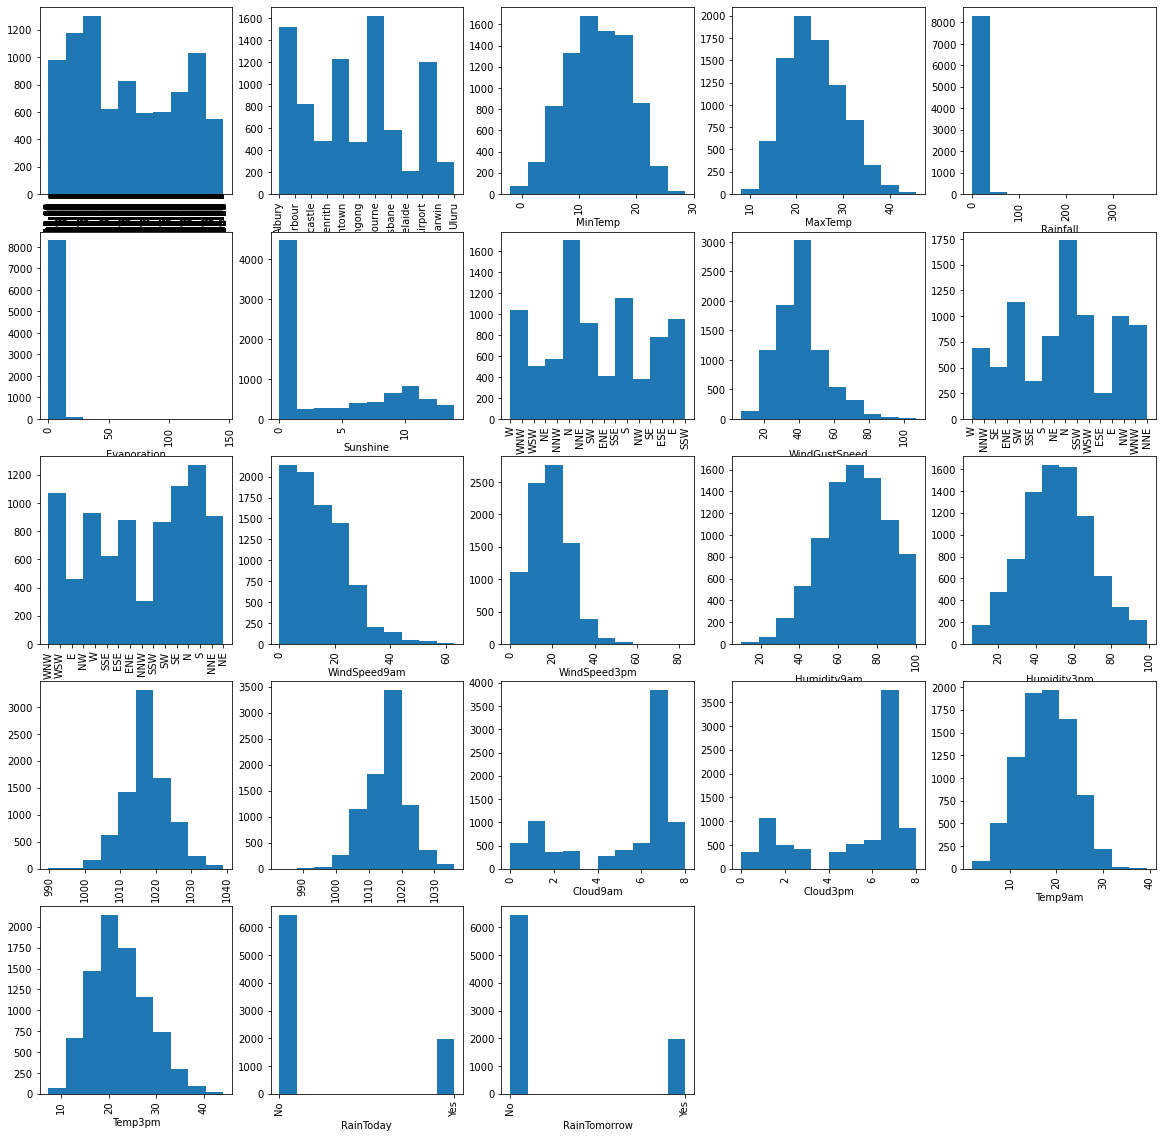

In [15]:
plt.figure(figsize = (20,20))
graph=1

for i in df.columns:
    if graph <=23:
        ax=plt.subplot(5,5,graph)
        plt.hist(df[i])
        plt.xlabel(i)
        plt.xticks(rotation=90)
        graph +=1
plt.show()

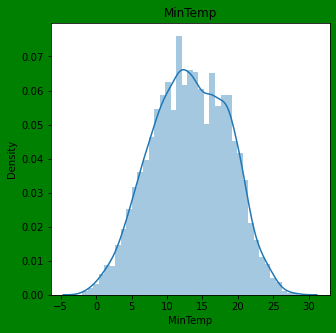

In [16]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['MinTemp'])
plt.xlabel('MinTemp')
plt.title('MinTemp')
plt.show()

MinTemp is Almost normally distributed.

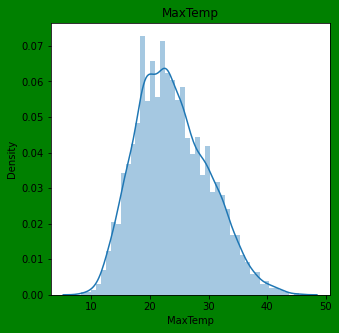

In [18]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['MaxTemp'])
plt.xlabel('MaxTemp')
plt.title('MaxTemp')
plt.show()

MaxTemp is Almost normally distributed.

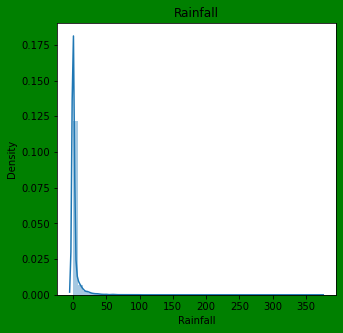

In [19]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Rainfall'])
plt.xlabel('Rainfall')
plt.title('Rainfall')
plt.show()

Rainfall is rightly skewed.

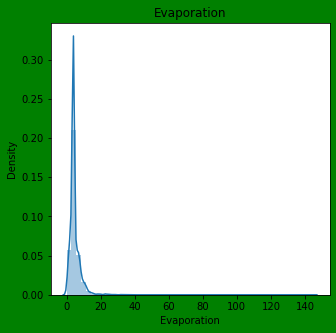

In [20]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Evaporation'])
plt.xlabel('Evaporation')
plt.title('Evaporation')
plt.show()

Evaporation is rightly skewed.

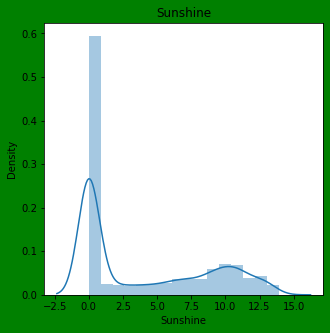

In [21]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Sunshine'])
plt.xlabel('Sunshine')
plt.title('Sunshine')
plt.show()

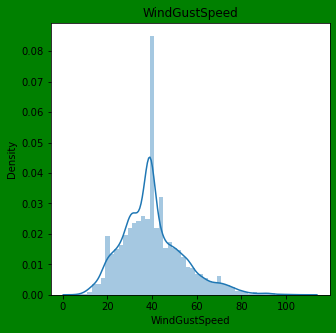

In [22]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['WindGustSpeed'])
plt.xlabel('WindGustSpeed')
plt.title('WindGustSpeed')
plt.show()

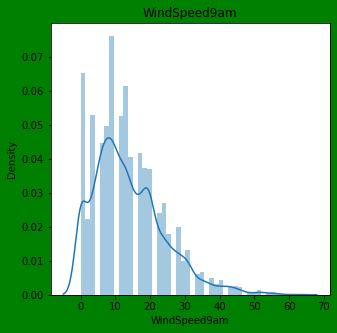

In [23]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['WindSpeed9am'])
plt.xlabel('WindSpeed9am')
plt.title('WindSpeed9am')
plt.show()

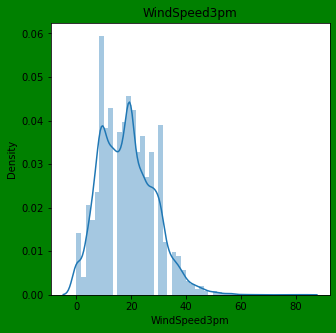

In [24]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['WindSpeed3pm'])
plt.xlabel('WindSpeed3pm')
plt.title('WindSpeed3pm')
plt.show()

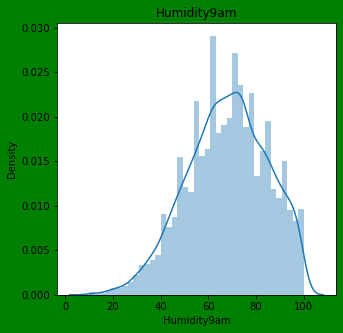

In [25]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Humidity9am'])
plt.xlabel('Humidity9am')
plt.title('Humidity9am')
plt.show()

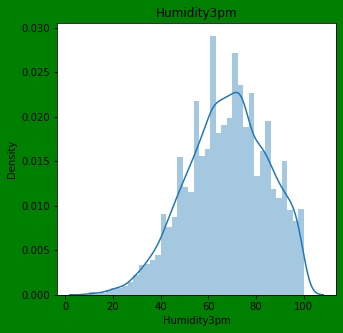

In [26]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Humidity9am'])
plt.xlabel('Humidity3pm')
plt.title('Humidity3pm')
plt.show()

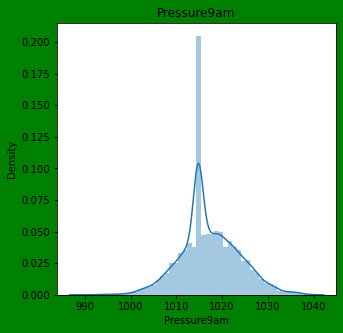

In [27]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Pressure9am'])
plt.xlabel('Pressure9am')
plt.title('Pressure9am')
plt.show()

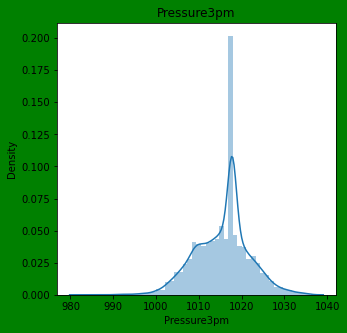

In [28]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Pressure3pm'])
plt.xlabel('Pressure3pm')
plt.title('Pressure3pm')
plt.show()


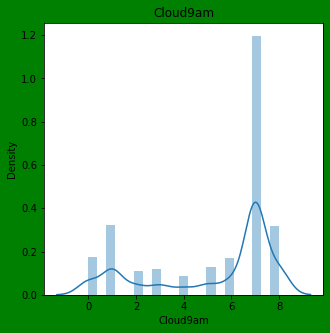

In [29]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Cloud9am'])
plt.xlabel('Cloud9am')
plt.title('Cloud9am')
plt.show()

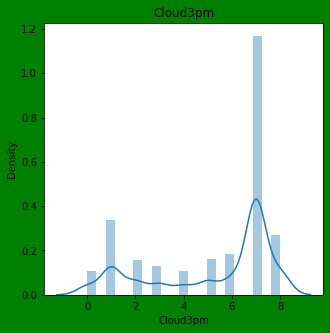

In [30]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Cloud3pm'])
plt.xlabel('Cloud3pm')
plt.title('Cloud3pm')
plt.show()

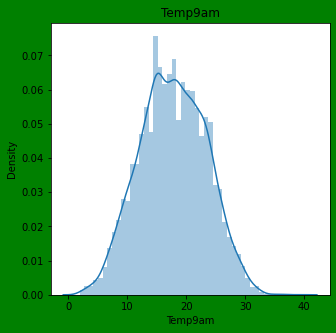

In [31]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Temp9am'])
plt.xlabel('Temp9am')
plt.title('Temp9am')
plt.show()

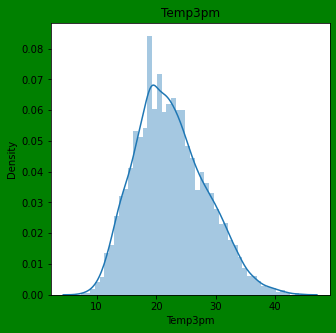

In [32]:
plt.figure(figsize = (5,5),facecolor='g')
sns.distplot(df['Temp3pm'])
plt.xlabel('Temp3pm')
plt.title('Temp3pm')
plt.show()

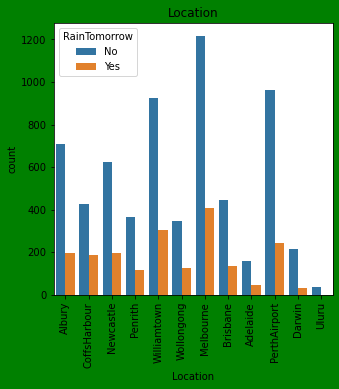

In [34]:
plt.figure(figsize = (5,5),facecolor='g')
sns.countplot( df['Location'],hue=df['RainTomorrow'],data=df )
plt.xlabel('Location')
plt.title('Location')
plt.xticks(rotation=90)
plt.show()

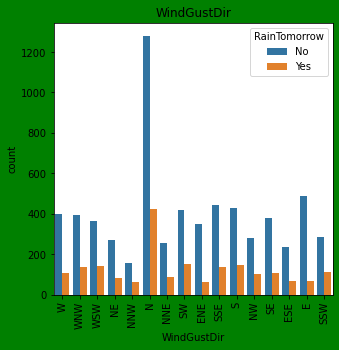

In [35]:
plt.figure(figsize = (5,5),facecolor='g')
sns.countplot( df['WindGustDir'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindGustDir')
plt.title('WindGustDir')
plt.xticks(rotation=90)
plt.show()

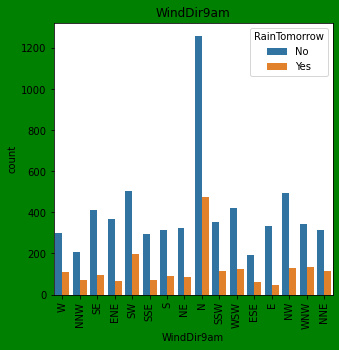

In [36]:
plt.figure(figsize = (5,5),facecolor='g')
sns.countplot( df['WindDir9am'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindDir9am')
plt.title('WindDir9am')
plt.xticks(rotation=90)
plt.show()

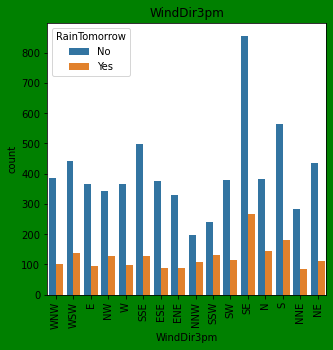

In [37]:
plt.figure(figsize = (5,5),facecolor='g')
sns.countplot( df['WindDir3pm'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindDir3pm')
plt.title('WindDir3pm')
plt.xticks(rotation=90)
plt.show()

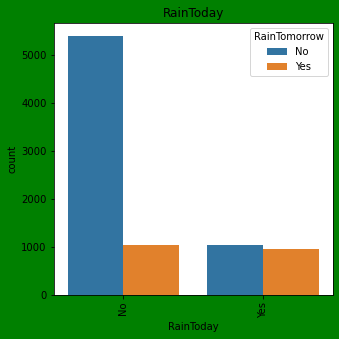

In [38]:
plt.figure(figsize = (5,5),facecolor='g')
sns.countplot( df['RainToday'],hue=df['RainTomorrow'],data=df )
plt.xlabel('RainToday')
plt.title('RainToday')
plt.xticks(rotation=90)
plt.show()

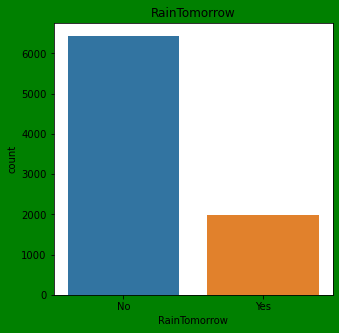

In [39]:
plt.figure(figsize = (5,5),facecolor='g')
sns.countplot( df['RainTomorrow'],data=df )
plt.xlabel('RainTomorrow')
plt.title('RainTomorrow')
plt.show()

there is imbalance in this columns which needs to be corrected

<Figure size 360x360 with 0 Axes>

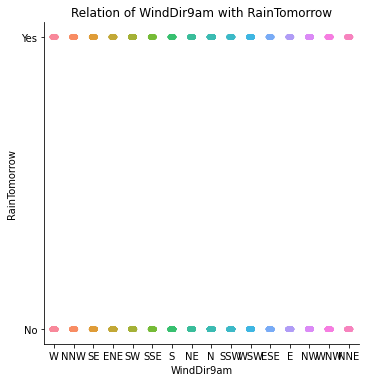

In [40]:
plt.figure(figsize = (5,5),facecolor='g')
sns.catplot( x =df['WindDir9am'],y =df['RainTomorrow'],data=df )
plt.xlabel('WindDir9am')
plt.ylabel('RainTomorrow')
plt.title('Relation of WindDir9am with RainTomorrow')
plt.show()

<Figure size 360x360 with 0 Axes>

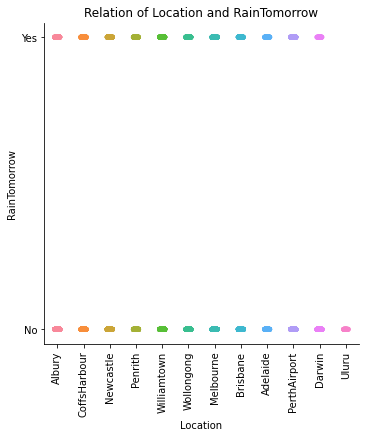

In [41]:
plt.figure(figsize = (5,5),facecolor='g')
sns.catplot( x =df['Location'],y =df['RainTomorrow'],data=df )
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('RainTomorrow')
plt.title('Relation of Location and RainTomorrow')
plt.show()

<Figure size 360x360 with 0 Axes>

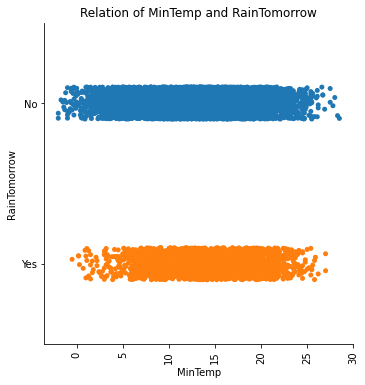

In [42]:
plt.figure(figsize = (5,5),facecolor='g')
sns.catplot( x =df['MinTemp'],y =df['RainTomorrow'],data=df )
plt.xlabel('MinTemp')
plt.xticks(rotation=90)
plt.ylabel('RainTomorrow')
plt.title('Relation of MinTemp and RainTomorrow')
plt.show()

<Figure size 360x360 with 0 Axes>

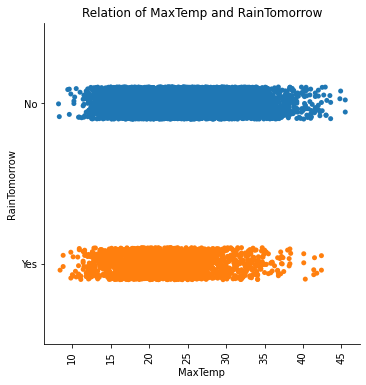

In [43]:
plt.figure(figsize = (5,5),facecolor='g')
sns.catplot( x =df['MaxTemp'],y =df['RainTomorrow'],data=df )
plt.xlabel('MaxTemp')
plt.xticks(rotation=90)
plt.ylabel('RainTomorrow')
plt.title('Relation of MaxTemp and RainTomorrow')
plt.show()

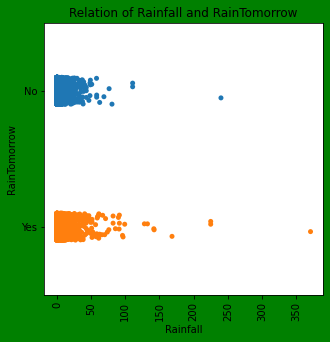

In [44]:
plt.figure(figsize = (5,5),facecolor='g')
sns.stripplot( x =df['Rainfall'],y =df['RainTomorrow'],data=df )
plt.xlabel('Rainfall')
plt.xticks(rotation=90)
plt.ylabel('RainTomorrow')
plt.title('Relation of Rainfall and RainTomorrow')
plt.show()

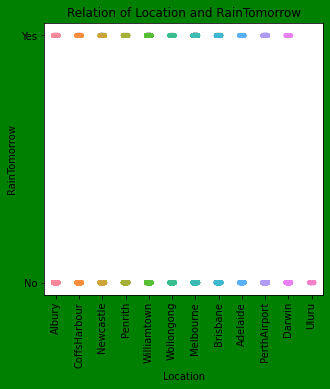

In [45]:
plt.figure(figsize = (5,5),facecolor='g')
sns.stripplot( x =df['Location'],y =df['RainTomorrow'],data=df )
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('RainTomorrow')
plt.title('Relation of Location and RainTomorrow')
plt.show()

# MultiVariate Analysis

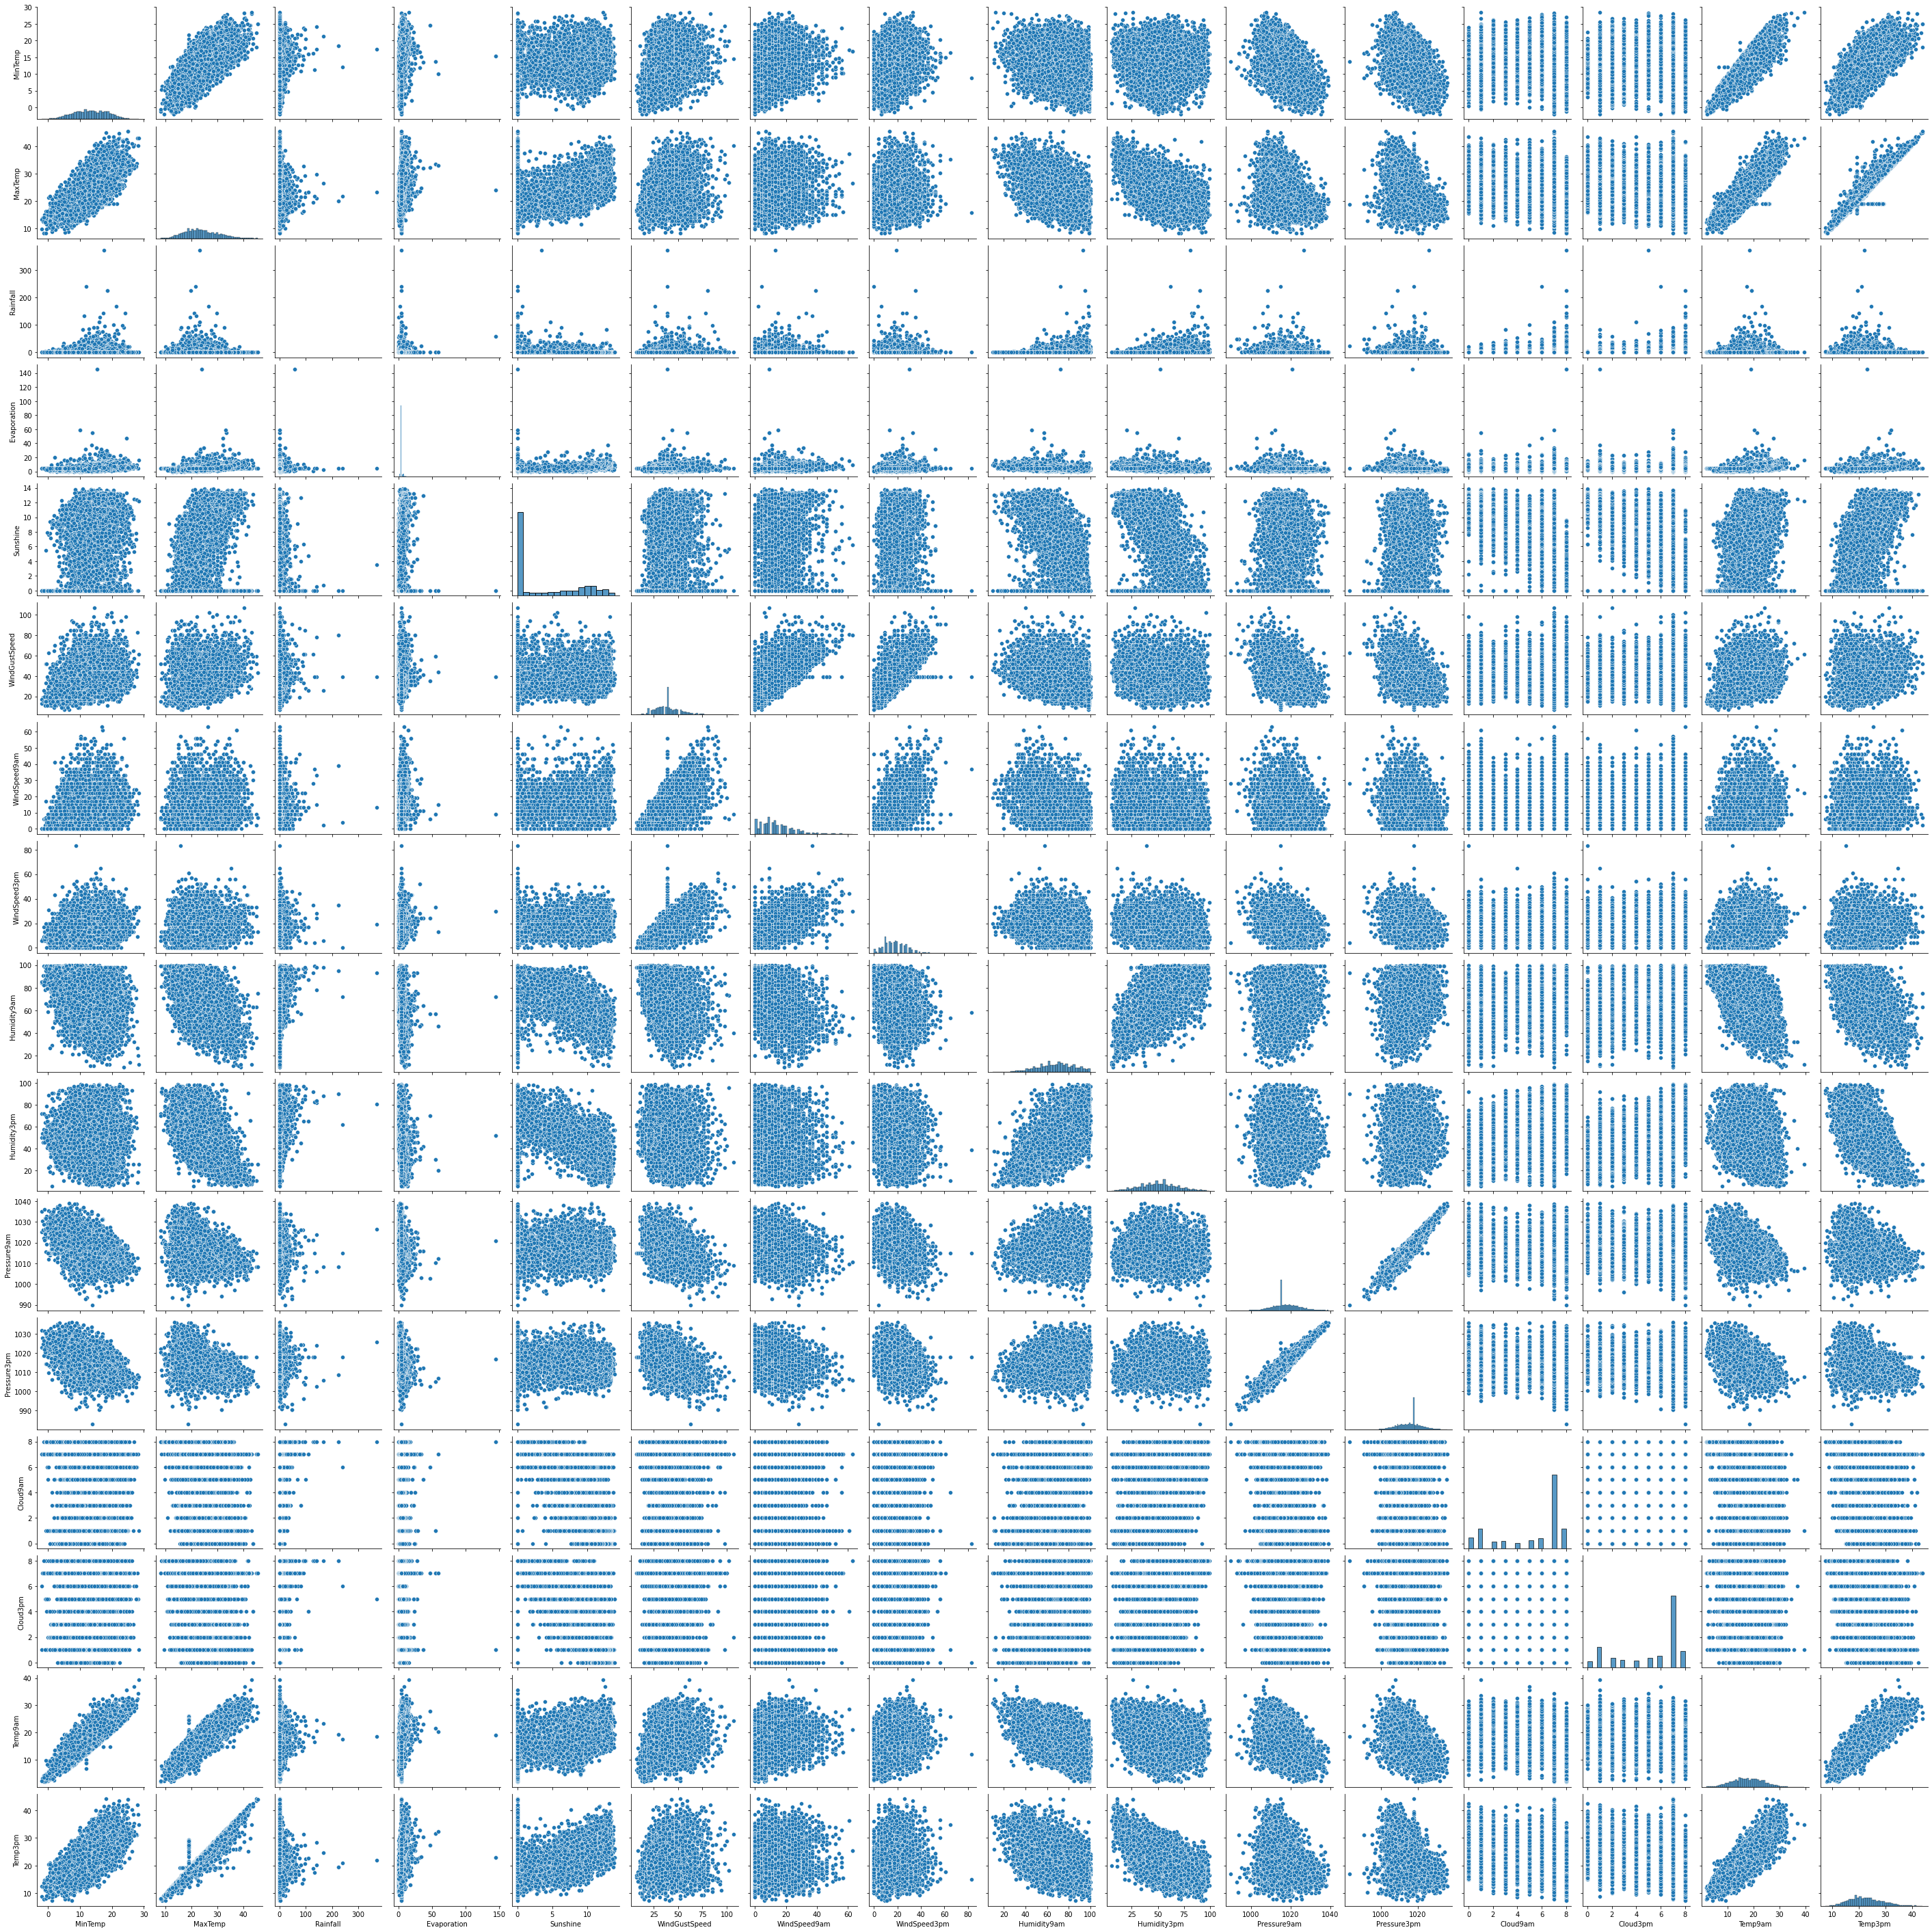

In [46]:
sns.pairplot(df)

# Checking and removing outliers using z-score

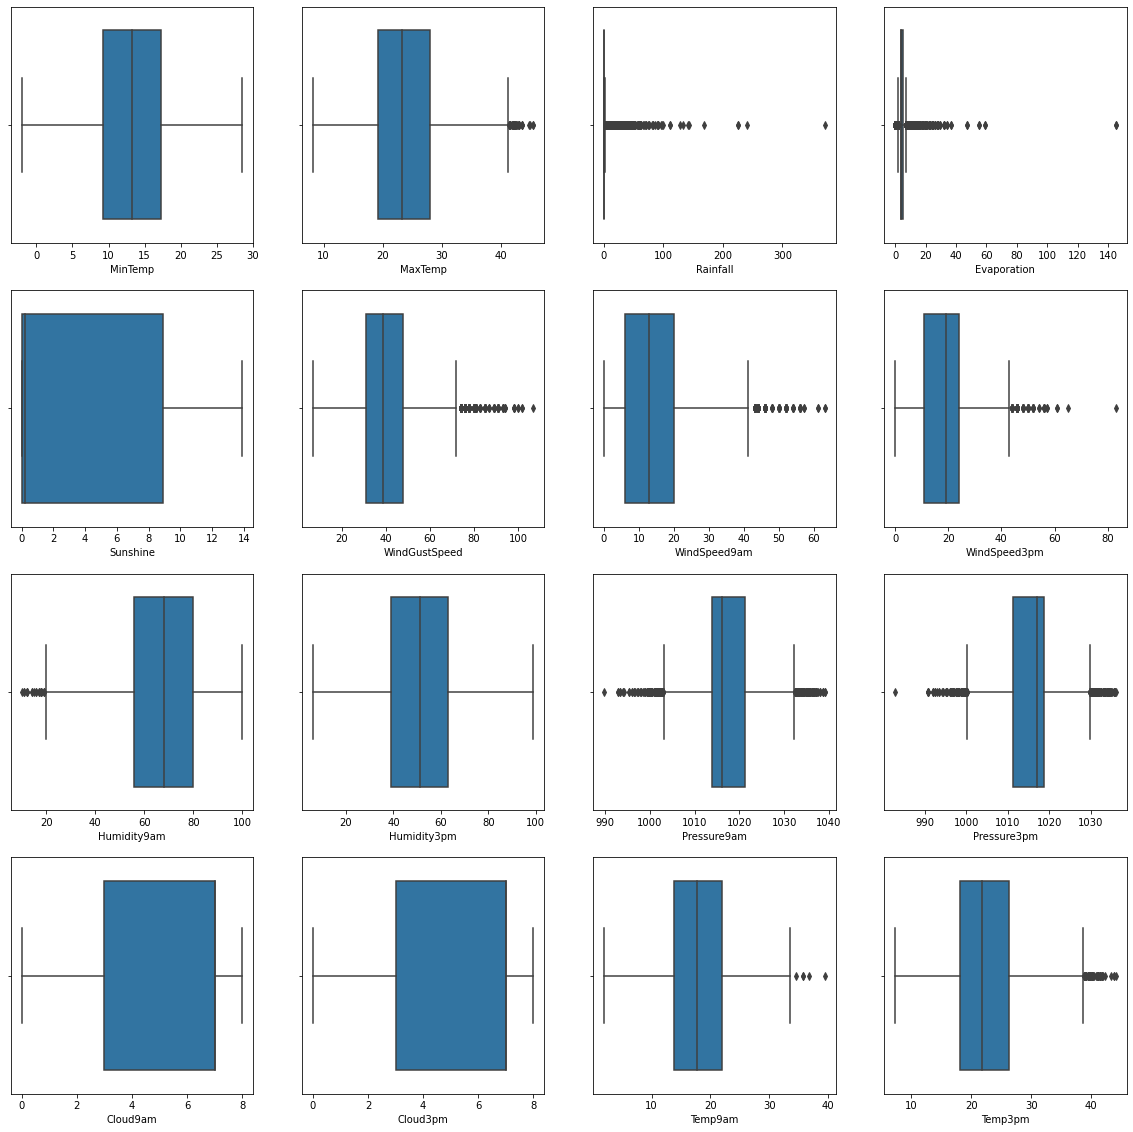

In [48]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']
plt.figure(figsize =(20,20))
graph =1
for i in columns:
    
    if graph <=16:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(df[i])
        plt.xlabel(i)
        graph +=1 
plt.show()

MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm has many outliers.

In [49]:
column = df[['MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
        'Pressure3pm','Temp9am','Temp3pm']]


z=np.abs(zscore(column))
z

array([[0.15101108, 0.20602081, 0.2070999 , ..., 1.35778976, 0.15006358,
        0.10175254],
       [0.20800875, 0.26416452, 0.2070999 , ..., 1.24643485, 0.09661746,
        0.318031  ],
       [0.30592325, 0.26416452, 0.2070999 , ..., 1.10326425, 0.58036664,
        0.13332624],
       ...,
       [0.50175225, 0.26416452, 0.2070999 , ..., 0.18527116, 0.93393991,
        0.62027515],
       [0.51807133, 0.26416452, 0.2070999 , ..., 0.13754763, 0.47074026,
        0.60348381],
       [0.78745533, 0.26416452, 0.2070999 , ..., 0.36025745, 0.48855563,
        0.25287462]])

In [50]:
threshold = 3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  466,  563,  568,  568,  569,  683,
         683,  699,  713,  748,  770,  796,  797,  802,  928,  935,  949,
         979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151,
        1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413,
        1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680,
        1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063, 2074,
        2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429, 2488,
        2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
        2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891, 2897,
        2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947,
        2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059, 3059,
        3060, 3066, 3067, 3067, 3067, 

In [51]:
df_new =df[(z<3).all(axis=1)]
df_new

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          4.0       0.0   
1     2008-12-02   Albury      7.4     25.1       0.0          4.0       0.0   
2     2008-12-03   Albury     12.9     25.7       0.0          4.0       0.0   
3     2008-12-04   Albury      9.2     28.0       0.0          4.0       0.0   
4     2008-12-05   Albury     17.5     32.3       1.0          4.0       0.0   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          4.0       0.0   
8421  2017-06-22    Uluru      3.6     25.3       0.0          4.0       0.0   
8422  2017-06-23    Uluru      5.4     26.9       0.0          4.0       0.0   
8423  2017-06-24    Uluru      7.8     27.0       0.0          4.0       0.0   
8424  2017-06-25    Uluru     14.9     19.0       0.0          4.0       0.0   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424           N           39.0        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       7.0     16.9     21.8   
1          1010.6       1007.8       7.0       7.0     17.2     24.3   
2          1007.6       1008.7       7.0       2.0     21.0     23.2   
3          1017.6       1012.8       7.0       7.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       7.0       7.0     10.1     22.4   
8421       1023.5       1019.1       7.0       7.0     10.9     24.5   
8422       1021.0       1016.8       7.0       7.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No            No  

[7986 rows x 23 columns]

In [52]:
df.shape

(8425, 23)

In [53]:
df_new.shape

(7986, 23)

In [54]:
Data_Loss = ((8425-7986)/8425)*100
Data_Loss

5.210682492581602

# Skewness

In [55]:
df_new.skew()

MinTemp         -0.078160
MaxTemp          0.327128
Rainfall         3.518724
Evaporation      1.507495
Sunshine         0.593800
WindGustSpeed    0.536437
WindSpeed9am     0.722205
WindSpeed3pm     0.323679
Humidity9am     -0.237692
Humidity3pm      0.117050
Pressure9am      0.232142
Pressure3pm     -0.138552
Cloud9am        -0.845950
Cloud3pm        -0.783146
Temp9am         -0.028800
Temp3pm          0.350851
dtype: float64

Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Cloud9am,Cloud3pm have skewed values,means not in range +/- 0.5.

In [57]:
skewed_features = ["Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","Cloud9am","Cloud3pm"]
scaler = PowerTransformer(method='yeo-johnson')

In [58]:
df_new[skewed_features] = scaler.fit_transform(df_new[skewed_features].values)
df_new[skewed_features].head()

Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  Cloud9am  \
0  0.773027    -0.090354   -0.9523       0.449852      0.789493  1.174725   
1 -0.654076    -0.090354   -0.9523       0.449852     -0.977515  0.656350   
2 -0.654076    -0.090354   -0.9523       0.594848      0.705758  0.656350   
3 -0.654076    -0.090354   -0.9523      -1.249784     -0.056219  0.656350   
4  1.135524    -0.090354   -0.9523       0.225685     -0.534239  0.656350   

   Cloud3pm  
0  0.706043  
1  0.706043  
2 -1.315787  
3  0.706043  
4  1.237701

In [59]:
# Again checking skewness:
df_new.skew()

MinTemp         -0.078160
MaxTemp          0.327128
Rainfall         1.041316
Evaporation      0.031839
Sunshine         0.196645
WindGustSpeed    0.004332
WindSpeed9am    -0.109077
WindSpeed3pm     0.323679
Humidity9am     -0.237692
Humidity3pm      0.117050
Pressure9am      0.232142
Pressure3pm     -0.138552
Cloud9am        -0.654028
Cloud3pm        -0.582904
Temp9am         -0.028800
Temp3pm          0.350851
dtype: float64

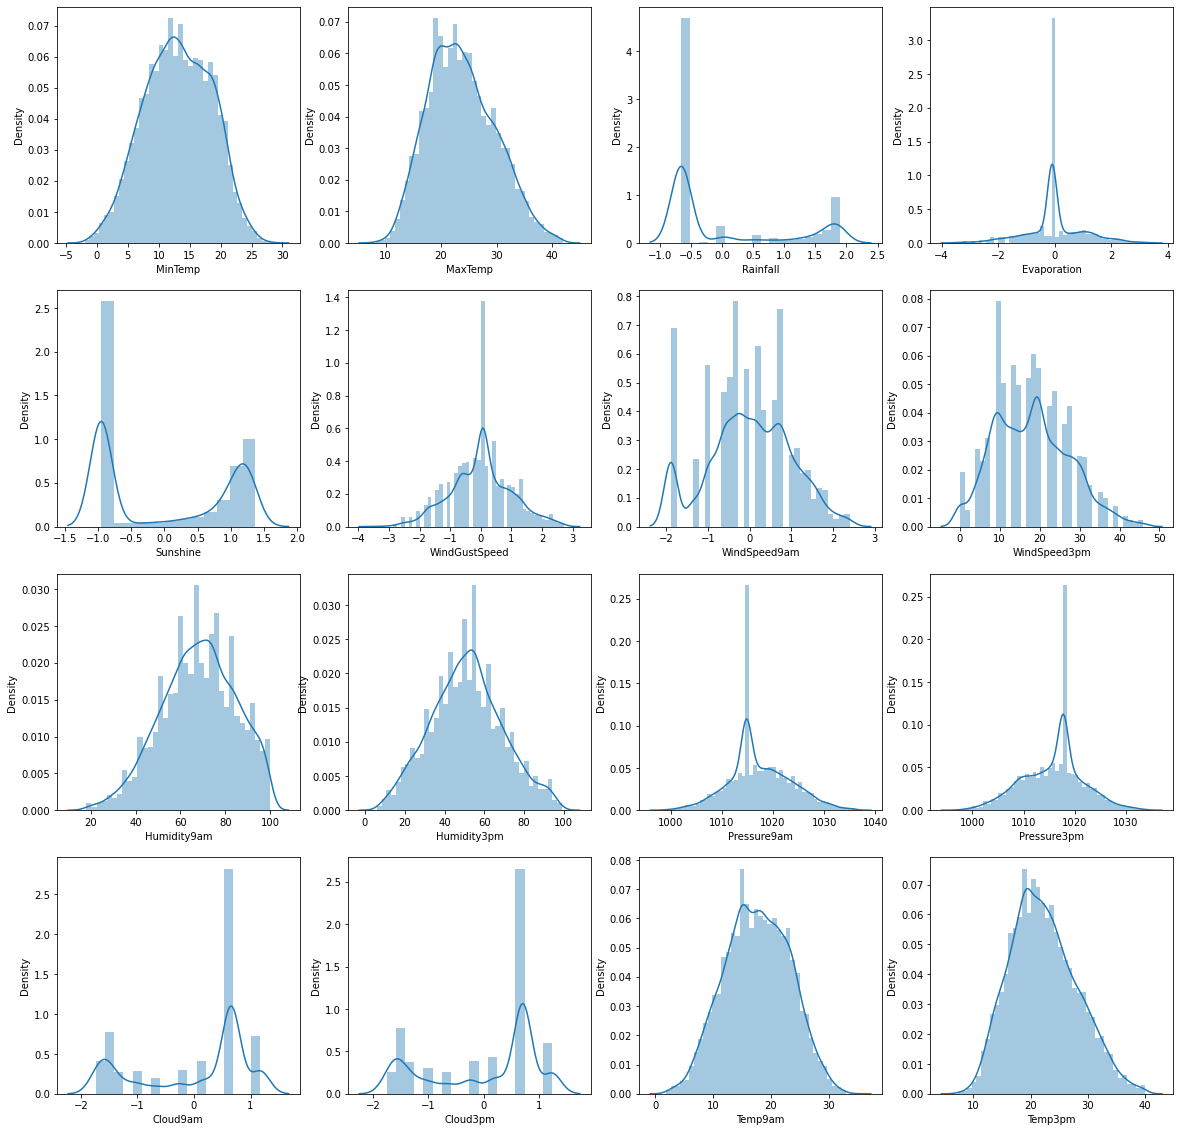

In [60]:
##  Again Checking distribution in numerical column:-
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']

plt.figure(figsize = (20,20))
graph=1
for i in columns:
    if graph <=16:
        ax =plt.subplot(4,4,graph)
        sns.distplot(df_new[i])
        plt.xlabel(i)
        graph +=1
plt.show()

Now all numerical columns except rainfall are showing almost normal distribution.

# Label Encoder

In [61]:
col =['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']
le=LabelEncoder()
df_new[col]= df_new[col].apply(le.fit_transform)

In [62]:
df_new.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1     13.4     22.9  0.773027    -0.090354   -0.9523   
1     1         1      7.4     25.1 -0.654076    -0.090354   -0.9523   
2     2         1     12.9     25.7 -0.654076    -0.090354   -0.9523   
3     3         1      9.2     28.0 -0.654076    -0.090354   -0.9523   
4     4         1     17.5     32.3  1.135524    -0.090354   -0.9523   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13       0.449852          13  ...         71.0         22.0   
1           14       0.449852           6  ...         44.0         25.0   
2           15       0.594848          13  ...         38.0         30.0   
3            4      -1.249784           9  ...         45.0         16.0   
4           13       0.225685           1  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  1.174725  0.706043     16.9     21.8          0   
1       1010.6       1007.8  0.656350  0.706043     17.2     24.3          0   
2       1007.6       1008.7  0.656350 -1.315787     21.0     23.2          0   
3       1017.6       1012.8  0.656350  0.706043     18.1     26.5          0   
4       1010.8       1006.0  0.656350  1.237701     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

# Correlation

In [63]:
df_new.corr()

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.465119  0.011182  0.099807  0.002704     0.072227   
Location       0.465119  1.000000  0.116661  0.063374  0.009686     0.090686   
MinTemp        0.011182  0.116661  1.000000  0.717729  0.062827     0.401778   
MaxTemp        0.099807  0.063374  0.717729  1.000000 -0.245484     0.492894   
Rainfall       0.002704  0.009686  0.062827 -0.245484  1.000000    -0.204297   
Evaporation    0.072227  0.090686  0.401778  0.492894 -0.204297     1.000000   
Sunshine      -0.315649 -0.126860  0.132620  0.212367 -0.110531     0.177774   
WindGustDir   -0.093751 -0.037752 -0.153277 -0.231470  0.134100    -0.102473   
WindGustSpeed -0.027869  0.256528  0.250493  0.151717  0.072644     0.205070   
WindDir9am    -0.034169 -0.040598 -0.042955 -0.212715  0.155815    -0.079320   
WindDir3pm    -0.006213 -0.031205 -0.153982 -0.190317  0.119930    -0.039577   
WindSpeed9am  -0.103018  0.240853  0.163868  0.025085  0.025404     0.162214   
WindSpeed3pm  -0.071025  0.228533  0.189950  0.097834  0.020644     0.144342   
Humidity9am    0.093228  0.004012 -0.127710 -0.383826  0.405783    -0.376215   
Humidity3pm   -0.036155  0.060605  0.088943 -0.410213  0.385817    -0.248693   
Pressure9am   -0.029123 -0.039289 -0.415328 -0.324094 -0.105249    -0.253528   
Pressure3pm    0.079054 -0.000065 -0.435792 -0.414617 -0.019377    -0.284289   
Cloud9am       0.057822  0.042800  0.006197 -0.245189  0.216944    -0.160655   
Cloud3pm       0.063726  0.023892 -0.043339 -0.244180  0.182573    -0.177768   
Temp9am        0.065916  0.117203  0.888441  0.863498 -0.109053     0.481351   
Temp3pm        0.110228  0.059913  0.689531  0.973802 -0.256534     0.476615   
RainToday     -0.009220  0.003097  0.061863 -0.217736  0.933364    -0.173927   
RainTomorrow  -0.003445  0.009530  0.091113 -0.146854  0.316005    -0.093763   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Date          -0.315649    -0.093751      -0.027869   -0.034169  ...   
Location      -0.126860    -0.037752       0.256528   -0.040598  ...   
MinTemp        0.132620    -0.153277       0.250493   -0.042955  ...   
MaxTemp        0.212367    -0.231470       0.151717   -0.212715  ...   
Rainfall      -0.110531     0.134100       0.072644    0.155815  ...   
Evaporation    0.177774    -0.102473       0.205070   -0.079320  ...   
Sunshine       1.000000    -0.007797       0.111998    0.034716  ...   
WindGustDir   -0.007797     1.000000       0.010874    0.405246  ...   
WindGustSpeed  0.111998     0.010874       1.000000   -0.060262  ...   
WindDir9am     0.034716     0.405246      -0.060262    1.000000  ...   
WindDir3pm    -0.032012     0.508379       0.082126    0.244263  ...   
WindSpeed9am   0.285548     0.083626       0.546491    0.145722  ...   
WindSpeed3pm   0.214603     0.119131       0.633710    0.066970  ...   
Humidity9am   -0.325783     0.028997      -0.278267    0.006558  ...   
Humidity3pm   -0.235090     0.048538      -0.089230    0.116334  ...   
Pressure9am    0.053045    -0.053995      -0.349491    0.019055  ...   
Pressure3pm   -0.095744    -0.045459      -0.341915    0.056072  ...   
Cloud9am      -0.512249     0.157637      -0.030973    0.085381  ...   
Cloud3pm      -0.477382     0.124790       0.001206    0.061516  ...   
Temp9am        0.220255    -0.181862       0.220905   -0.097174  ...   
Temp3pm        0.203489    -0.243155       0.117553   -0.219792  ...   
RainToday     -0.082331     0.120785       0.076495    0.148555  ...   
RainTomorrow  -0.130083     0.044030       0.173221    0.027015  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date              0.093228    -0.036155    -0.029123     0.079054  0.057822   
Location          0.004012     0.060605    -0.039289    -0.000065  0.042800   
MinTemp          -0.127710     0.088943    -0.415328    -0.435792  0.006197   
MaxTemp          -0.383826    -0.410213    -0.324094 

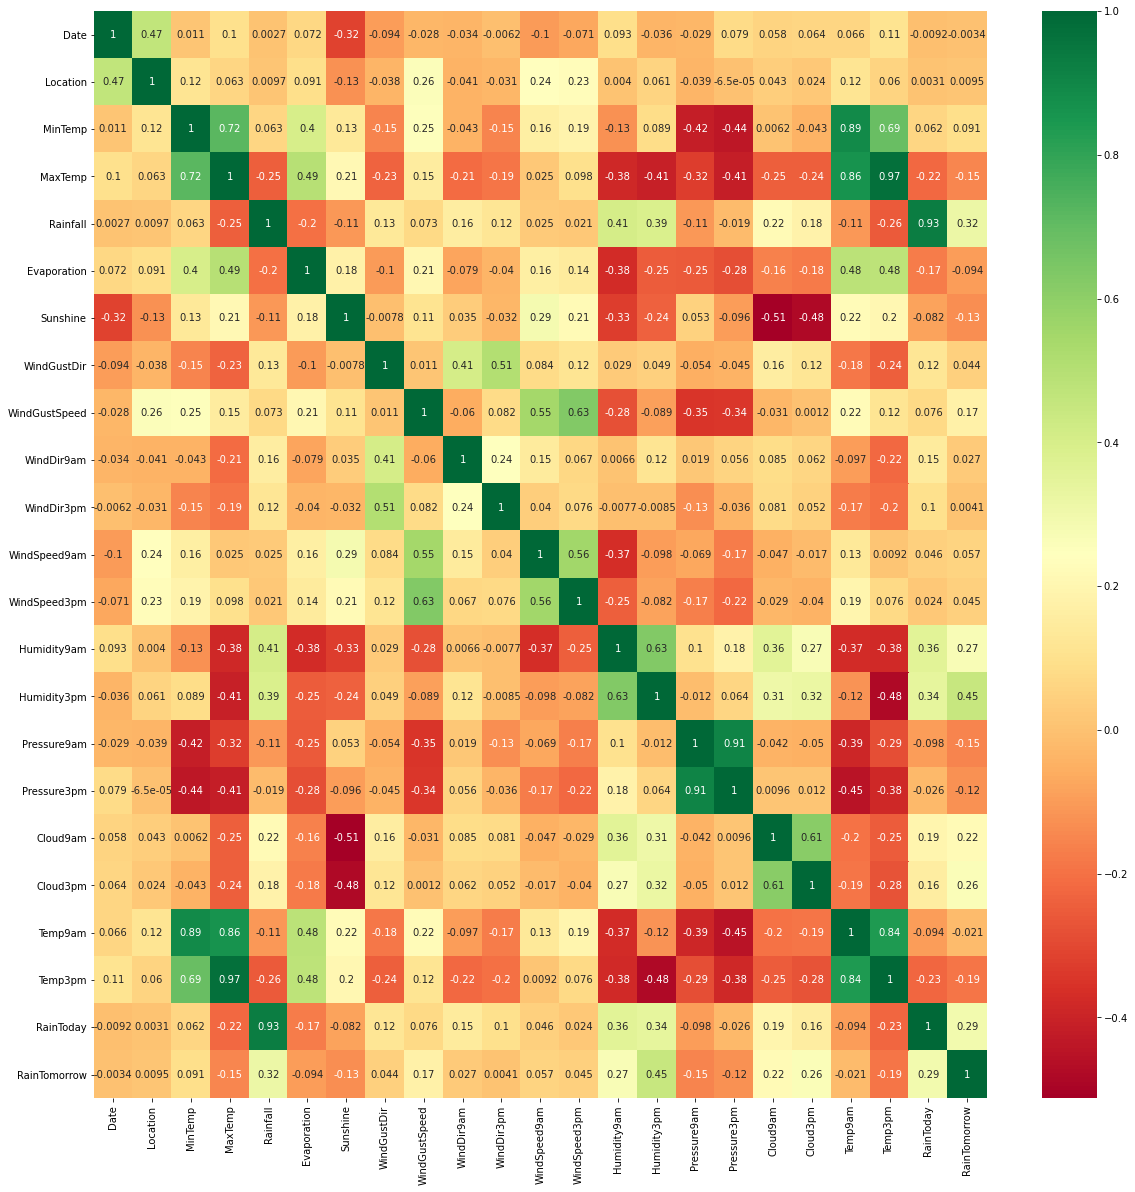

In [64]:
plt.figure(figsize = (20,20))
sns.heatmap(df_new.corr(),annot =True,cmap ='RdYlGn')
plt.show()

So Date,Location,WindDir9am,WindDir3pm correlation with Target 'RainTomorrow',for classification and 'Rainfall'for regression is very weak. MinTemp,Maxtemp is strongly correlated with Temp9am. Maxtemp is very much strongly correlated with Temp3pm. MinTemp,MaxTemp correlation with Target 'RainTomorrow',for classification and 'Rainfall'for regression is very weak. Rainfall Is strongly correlated with RainToday. Evapouration correlation with Target 'RainTomorrow',for classification and 'Rainfall'for regression is very weak. Date,MaxTemp,Evapouration,Pressure9am,Pressure3pm,Temp9am,Temp3pm correlation with Target 'RainTomorrow',for classification and 'Rainfall'for regression is very weak and neagatively correlated.

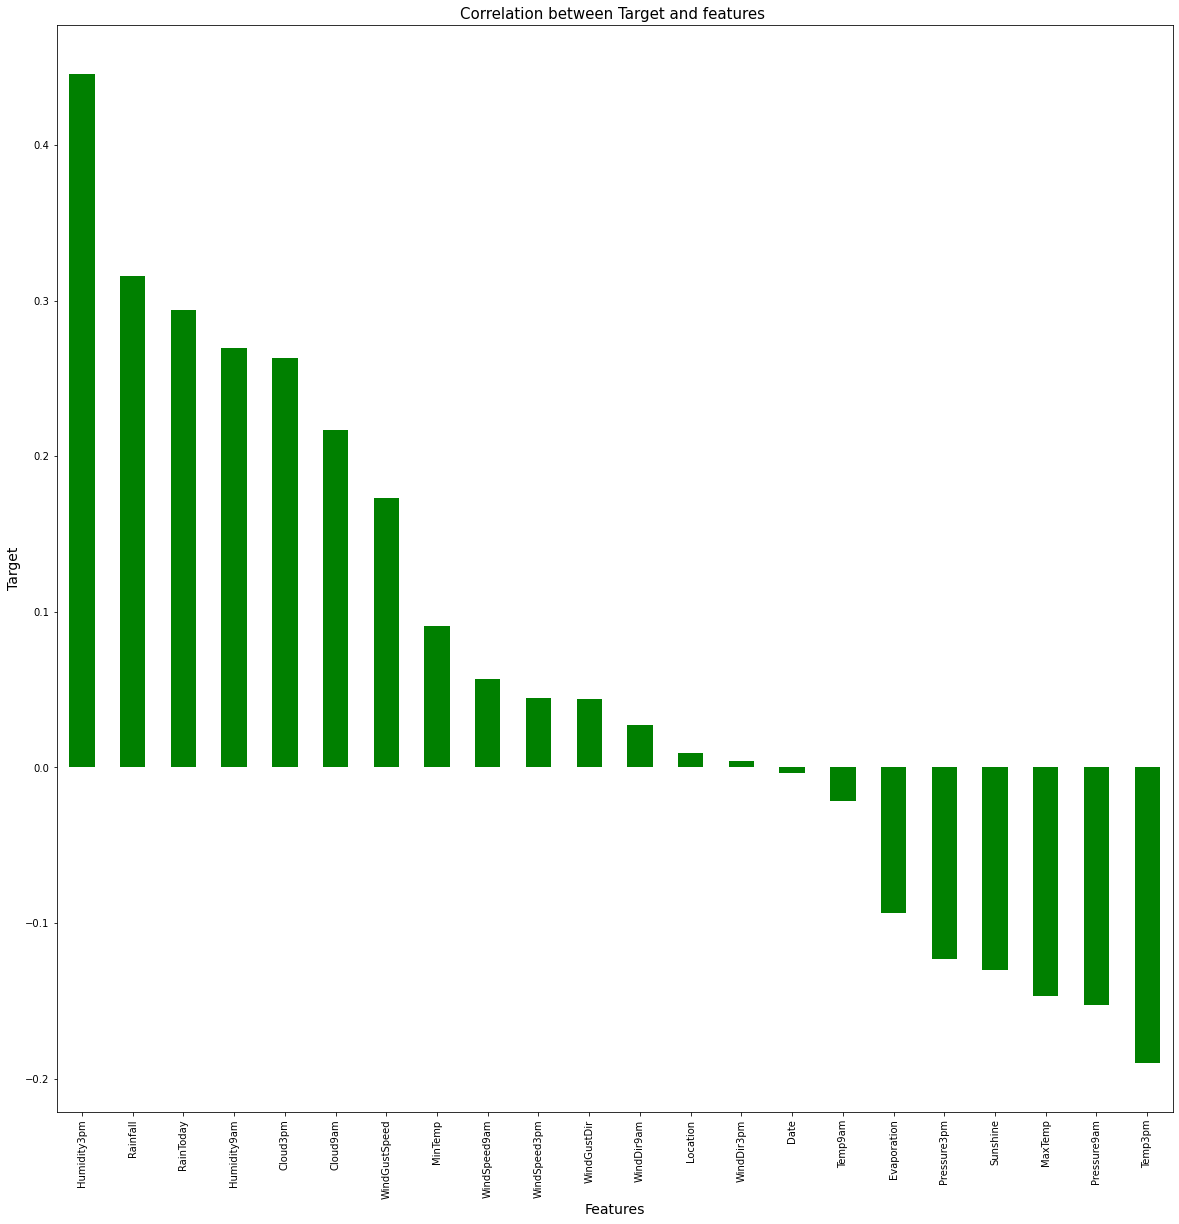

In [65]:
plt.figure(figsize=(20,20))
df_new.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

In [66]:
## Dropping unnecessary column Date:
df_new.drop('Date',axis=1,inplace=True)
df_new.shape

(7986, 22)

# Separating Features and Target for Classification Problem:

In [67]:
x = df_new.drop('RainTomorrow',axis=1)
y= df_new['RainTomorrow']

In [68]:
x.shape,y.shape

((7986, 21), (7986,))

In [69]:
y.value_counts()

0    6164
1    1822
Name: RainTomorrow, dtype: int64

Data is not balanced in target column,So will balace it through oversampling.

In [71]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [72]:
y.value_counts()


0    6164
1    6164
Name: RainTomorrow, dtype: int64

# Standard Scaler

In [75]:
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0     -1.529209 -0.006152 -0.043558  0.530921    -0.023116 -0.929838   
1     -1.529209 -1.145469  0.328493 -0.824278    -0.023116 -0.929838   
2     -1.529209 -0.101095  0.429961 -0.824278    -0.023116 -0.929838   
3     -1.529209 -0.803674  0.818922 -0.824278    -0.023116 -0.929838   
4     -1.529209  0.772382  1.546111  0.875154    -0.023116 -0.929838   
...         ...       ...       ...       ...          ...       ...   
12323  0.423195 -0.633867  0.537574 -0.824278    -0.585861  0.618381   
12324 -0.878408 -0.827888 -0.978185 -0.681790    -1.844687  0.871459   
12325 -1.529209  1.430507  1.216555 -0.443902    -0.116818 -0.531784   
12326  1.399397  0.981342  0.468603  1.547642     1.764655 -0.929838   
12327 -0.878408  1.043635  0.379068 -0.824278     0.657643  0.197066   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
0         1.285550       0.344975    1.289887    1.472553  ...      0.612146   
1         1.507223       0.344975   -0.277337    1.706214  ...      0.401080   
2         1.728895       0.491059    1.289887    1.706214  ...      0.823212   
3        -0.709503      -1.367403    0.394330   -1.798708  ...     -0.970851   
4         1.285550       0.119128   -1.396783   -0.163078  ...      0.190013   
...            ...            ...         ...         ...  ...           ...   
12323    -0.931176      -0.375592   -0.501226   -1.097724  ...      0.321766   
12324    -0.044486       0.216031    0.842109    0.771568  ...      1.034278   
12325    -0.709503       0.354626   -0.949005   -0.864062  ...      0.752694   
12326     1.507223       0.512731    0.394330   -1.331385  ...      0.756356   
12327    -0.931176       1.699715   -0.949005   -1.097724  ...      2.164896   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0        -0.000149    -1.824764    -1.512846    -1.382883  1.114494  0.580892   
1        -1.668895    -1.666636    -1.028977    -1.266057  0.554918  0.580892   
2        -2.039727    -1.403090    -1.529532    -1.115851  0.554918 -1.612301   
3        -1.607089    -2.141019     0.138985    -0.431583  0.554918  0.580892   
4         0.679711    -1.244962    -0.995606    -1.566467  0.554918  1.157612   
...            ...          ...          ...          ...       ...       ...   
12323    -0.127694    -1.274508     0.417839     0.356968 -1.086626 -0.427755   
12324    -0.848418     0.063100     0.793849     0.713270  0.084331  0.580892   
12325    -1.287738    -0.621134    -0.650252    -0.887273 -1.831435  0.694891   
12326     0.657337     1.074246    -0.259724    -0.742492  0.605560  0.633085   
12327    -0.000052     0.554707    -1.024430    -1.800407  0.104210  0.681689   

        Temp9am   Temp3pm  RainToday  
0     -0.123094  0.029490  -0.595713  
1     -0.068117  0.462319  -0.595713  
2      0.628252  0.271874  -0.595713  
3      0.096812  0.843209  -0.595713  
4      0.041836  1.397231  -0.595713  
...         ...       ...        ...  
12323 -0.235266  0.652549  -0.595713  
12324 -0.656378 -0.941327  -0.595713  
12325  1.416164  1.209518  -0.595713  
12326  1.024944  0.363374   1.678660  
12327  0.779965  0.254480  -0.595713  

[12328 rows x 21 columns]

# Checking for Multicollinearity Problem using VIF:-

In [76]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values       Features
0     1.247715       Location
1     9.357831        MinTemp
2    25.167822        MaxTemp
3     4.775090       Rainfall
4     1.433324    Evaporation
5     1.841463       Sunshine
6     1.604877    WindGustDir
7     2.290358  WindGustSpeed
8     1.385612     WindDir9am
9     1.506420     WindDir3pm
10    2.357951   WindSpeed9am
11    2.146641   WindSpeed3pm
12    4.140376    Humidity9am
13    5.923910    Humidity3pm
14    8.586500    Pressure9am
15    8.486753    Pressure3pm
16    2.022180       Cloud9am
17    1.811515       Cloud3pm
18   19.260270        Temp9am
19   33.683892        Temp3pm
20    4.011066      RainToday

In [77]:
## MaxTemp,Temp9am,Temp3pm have values greater than 10.Vif value for Temp3pm is maximum ,so deleting this column.
x.drop('Temp3pm',axis=1,inplace=True)

In [78]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     1.244857       Location
1     9.267754        MinTemp
2     9.542999        MaxTemp
3     4.775031       Rainfall
4     1.433155    Evaporation
5     1.807792       Sunshine
6     1.599074    WindGustDir
7     2.277136  WindGustSpeed
8     1.384477     WindDir9am
9     1.504755     WindDir3pm
10    2.357382   WindSpeed9am
11    2.140105   WindSpeed3pm
12    3.595856    Humidity9am
13    3.547552    Humidity3pm
14    8.331526    Pressure9am
15    8.280455    Pressure3pm
16    2.022100       Cloud9am
17    1.796215       Cloud3pm
18   17.721299        Temp9am
19    4.009779      RainToday

A except temp9am is having >10 vif so we need to drop this column

In [79]:
## Dropping column Temp9am
x.drop('Temp9am',axis=1,inplace=True)

In [80]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     1.226179       Location
1     4.533402        MinTemp
2     5.646987        MaxTemp
3     4.768693       Rainfall
4     1.433142    Evaporation
5     1.807141       Sunshine
6     1.597539    WindGustDir
7     2.245609  WindGustSpeed
8     1.383181     WindDir9am
9     1.503694     WindDir3pm
10    2.318509   WindSpeed9am
11    2.105062   WindSpeed3pm
12    2.565841    Humidity9am
13    2.856239    Humidity3pm
14    8.324462    Pressure9am
15    8.263366    Pressure3pm
16    1.984667       Cloud9am
17    1.783618       Cloud3pm
18    4.009730      RainToday

# Train test split and model training

In [81]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9418761827520952  on Random_state  181


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# KNeighborsClassifier

In [84]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))

0.8745606920789403
[[1491  367]
 [  97 1744]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1858
           1       0.83      0.95      0.88      1841

    accuracy                           0.87      3699
   macro avg       0.88      0.87      0.87      3699
weighted avg       0.88      0.87      0.87      3699



# Support Vector Machine Classifier

In [85]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8707758853744255
[[1590  268]
 [ 210 1631]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1858
           1       0.86      0.89      0.87      1841

    accuracy                           0.87      3699
   macro avg       0.87      0.87      0.87      3699
weighted avg       0.87      0.87      0.87      3699



# DecisionTreeClassifier

In [86]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.8788861854555285
[[1626  232]
 [ 216 1625]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1858
           1       0.88      0.88      0.88      1841

    accuracy                           0.88      3699
   macro avg       0.88      0.88      0.88      3699
weighted avg       0.88      0.88      0.88      3699



# AdaBoostClassifier

In [89]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
predadb = adb.predict(x_test)

print(accuracy_score(y_test, predadb))
print(confusion_matrix(y_test, predadb))
print(classification_report(y_test,predadb))

0.8334685050013517
[[1566  292]
 [ 324 1517]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1858
           1       0.84      0.82      0.83      1841

    accuracy                           0.83      3699
   macro avg       0.83      0.83      0.83      3699
weighted avg       0.83      0.83      0.83      3699



# RandomForestClassifier

In [90]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.9421465260881319
[[1747  111]
 [ 103 1738]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1858
           1       0.94      0.94      0.94      1841

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



# LogisticRegression

In [91]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
predlgr = lgr.predict(x_test)

print(accuracy_score(y_test, predlgr))
print(confusion_matrix(y_test, predlgr))
print(classification_report(y_test,predlgr))

0.7853473911868073
[[1490  368]
 [ 426 1415]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1858
           1       0.79      0.77      0.78      1841

    accuracy                           0.79      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.79      0.79      0.79      3699



# Cross Validation

In [93]:
cvs = cross_val_score(lgr, x, y, cv=10)
print("Cross Validation of LogisticRegression model ",cvs.mean())

Cross Validation of LogisticRegression model  0.7256018869613761


In [94]:
cvs = cross_val_score(knc, x, y, cv=10)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())


Cross Validation of KNeighbors Classifier model  0.8001408111353367


In [95]:
cvs = cross_val_score(dtc, x, y, cv=10)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())

Cross Validation of DecisionTree Classifier model  0.827557180248786


In [96]:
cvs = cross_val_score(svc, x, y, cv=10)
print("Cross Validation of Support Vector Machine Classifier model ",cvs.mean())

Cross Validation of Support Vector Machine Classifier model  0.7901680385713232


In [97]:
cvs = cross_val_score(rfc, x, y, cv=10)
print("Cross Validation of Random Forest Classifier model ",cvs.mean())

Cross Validation of Random Forest Classifier model  0.8909074451501459


In [98]:

cvs = cross_val_score(adb, x, y, cv=10)
print("Cross Validation of Ada Boost Classifier model ",cvs.mean())

Cross Validation of Ada Boost Classifier model  0.7511532820383187


Cross validation score is highest for Random Forest,So will do hyper parameter tuning for Random Forest.

# HyperParameter Tuning

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = maxRS,test_size = 0.30)
rfc = RandomForestClassifier()
parameters={'n_estimators' : [100,200],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10),
            'max_features':["auto","sqrt","log2"],
            }


    
gridsearch=GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 200}

In [100]:
## Providing Best parameter to model:-
rf = RandomForestClassifier(criterion='gini',n_estimators=200,max_features='auto',max_depth=9)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
score = accuracy_score(y_test,predrf)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score : 88.48337388483374
[[1620  238]
 [ 188 1653]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1858
           1       0.87      0.90      0.89      1841

    accuracy                           0.88      3699
   macro avg       0.89      0.88      0.88      3699
weighted avg       0.89      0.88      0.88      3699



# Plotting roc_auc_curve

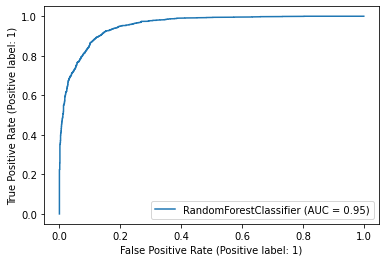

In [102]:
plot_roc_curve(rf,x_test,y_test)

Area Under Curve is 95% for RandomForest

# Saving the Model:-

In [104]:
import pickle
filename ='Rainfall_Prediction_Classification.pickle'
pickle.dump(rfc,open(filename,'wb'))

# Model Building for Regression Label

In [105]:
df_new.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [106]:
df_new.shape

(7986, 22)

In [107]:
#assign the value of x and y for training and testing phase
xr = df_new.drop('Rainfall',axis=1)
yr = df_new["Rainfall"]
print(xr.shape)
print(yr.shape)

(7986, 21)
(7986,)


In [108]:
sc = StandardScaler()
sc.fit_transform(xr)

array([[-1.50779508,  0.0593556 , -0.13814711, ..., -0.090778  ,
        -0.54290614, -0.54367939],
       [-1.50779508, -1.0547477 ,  0.22728609, ...,  0.33671111,
        -0.54290614, -0.54367939],
       [-1.50779508, -0.03348634,  0.3269497 , ...,  0.1486159 ,
        -0.54290614, -0.54367939],
       ...,
       [ 1.02994332, -1.42611547,  0.5262769 , ...,  0.64450327,
        -0.54290614, -0.54367939],
       [ 1.02994332, -0.98047415,  0.5428875 , ...,  0.62740371,
        -0.54290614, -0.54367939],
       [ 1.02994332,  0.33788143, -0.78596053, ..., -0.24467408,
        -0.54290614, -0.54367939]])

# Finding Best Random State

In [109]:
maxscore=0
maxRS=0
for i in range(1,200):
    xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,test_size=0.30,random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(xr_train,yr_train)
    pred = rfr.predict(xr_test)
    score = r2_score(yr_test,pred)
    if score>maxscore:
        maxscore=score
        maxRS=i
print("Maximum r2 score is ",maxscore,"at Random_state",maxRS)

Maximum r2 score is  0.9208837590583241 at Random_state 50


In [111]:
xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,test_size=.30,random_state=maxRS)

# Random Forest Regressor

In [112]:
rfr = RandomForestRegressor()
rfr.fit(xr_train,yr_train)
predrfr = rfr.predict(xr_test)
print("R2_Score:",r2_score(yr_test,predrfr))

R2_Score: 0.9209055643357692


# DecisionTree Regressor

In [113]:
dtr = DecisionTreeRegressor()
dtr.fit(xr_train,yr_train)
preddtr = dtr.predict(xr_test)
print("R2_Score Decision Tree Regressor:",r2_score(yr_test,preddtr))

R2_Score Decision Tree Regressor: 0.8387110107731491


# KNeighbors Regressor

In [114]:
knn = KNeighborsRegressor()
knn.fit(xr_train,yr_train)
predknn = knn.predict(xr_test)
print("R2_Score using KNN Regressor:",r2_score(yr_test,predknn))

R2_Score using KNN Regressor: 0.319039997765197


# LinearRegression

In [115]:
lr = LinearRegression()
lr.fit(xr_train,yr_train)
predlr = lr.predict(xr_test)
print("R2_Score using Gradient Boosting Regressor:",r2_score(yr_test,predlr))

R2_Score using Gradient Boosting Regressor: 0.8930325863326531


# CrossValidation

In [116]:
cvs = cross_val_score(dtr, xr, yr, cv=10)
print("Cross Validation of DecisionTree Regression model ",cvs.mean())

Cross Validation of DecisionTree Regression model  0.8297416760835539


In [118]:
cvs = cross_val_score(rfr, xr, yr, cv=10)
print("Cross Validation of RandomForest Regression model ",cvs.mean())

Cross Validation of RandomForest Regression model  0.9128848038986594


In [119]:
cvs = cross_val_score(knn, xr, yr, cv=10)
print("Cross Validation of KNeighbors Regression model ",cvs.mean())

Cross Validation of KNeighbors Regression model  0.3048287525329826


In [120]:
cvs = cross_val_score(lr, xr, yr, cv=10)
print("Cross Validation of Linear Regression model ",cvs.mean())

Cross Validation of Linear Regression model  0.879813228349312


# HyperParameter Tuning

In [126]:
param_grid={'n_estimators' : [200],'criterion':['mse','mae']
                }

In [127]:
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=5,n_jobs=-1)

In [128]:
rf_grid.fit(xr_train,yr_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'n_estimators': [200]},
             verbose=5)

In [130]:
rf_grid.best_params_

{'criterion': 'mae', 'n_estimators': 200}

In [131]:
## providing best parameters:-
rf = RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
score = r2_score(y_test,pred)
score

0.7345225691955424

# Saving the model

In [132]:
import pickle 
filename='Rainfall_prediction_Regression.pickle'
pickle.dump(rfr,open(filename,'wb'))